In [361]:
from array import *
import random



def uniform_element_direction(grid, row_n, col_n ,length):
    count = 0
    for i in range(row_n-1):
        for j in range(col_n-1):
            if grid[i][j][1] == 'U' and grid[i - 1][j][0] == 'E':                      # if direction is up and pointing to empty 
                grid[i][j] = [grid[i][j][0],random.choice('DLR')]

            elif grid[i][j][1] == 'D' and  grid[i + 1][j][0] == 'E':              # if direction is down and pointing to empty
              grid[i][j] = [grid[i][j][0],random.choice('ULR')]
           
            elif grid[i][j][1] == 'L' and grid[i][j - 1][0] == 'E':                # if direction is on left and pointing to empty
              grid[i][j] = [grid[i][j][0],random.choice('UDR')]


            elif grid[i][j][1] == 'R' and grid[i][j + 1][0] == 'E':                # if direction is on Right and pointing to empty
              grid[i][j] = [grid[i][j][0],random.choice('UDL')]

    return grid


def interaction_calculation( row, col, grid, ch1, ch2):
    interaction_count = 0

    for i in range(row-1):
        for j in range(col-1):
            if grid[i][j][0] == ch1:
              if grid[i][j - 1][0] == ch2:                    # Left
                if grid[i][j - 1][1] != 'R':  # incrementing only if left cell is not connected
                  interaction_count = interaction_count + 1
                
              if grid[i - 1][j][0] == ch2: # Upper
                if grid[i][j - 1][1] != 'D': # incrementing only if Upper cell is not connected
                  interaction_count = interaction_count + 1
                
                if grid[i - 1][j - 1][0] == ch2:  # Upper Left
                  interaction_count = interaction_count + 1
               
                if grid[i][j + 1][0] == ch2:  # Right
                  if grid[i][j - 1][1] != 'L':  # incrementing only if right cell is not connected
                    interaction_count = interaction_count + 1
                
                if grid[i - 1][j + 1][0] == ch2:  # Upper Right
                  interaction_count = interaction_count + 1
              
                if grid[i + 1][j][0] == ch2:  # Lower
                  if grid[i][j - 1][1] != 'U':  # incrementing only if left cell is not connected
                    interaction_count = interaction_count + 1
                
                if grid[i + 1][j - 1][0] == ch2:  # Lower Left
                  interaction_count = interaction_count + 1
                
                if grid[i + 1][j + 1][1] == ch2:  # Lower Right
                  interaction_count = interaction_count + 1

    return interaction_count





def buried_calculation(row, col, grid):
    cal_buried = 0
    ch1_dict = 'H'
    ch2_dict = 'E'

    for i in range(row-1):
        for j in range(col-1):
            if grid[i][j][0] == ch1_dict:
                if grid[i][j-1][0] == ch2_dict:                      # Left
                  cal_buried = cal_buried + 1
                
                if grid[i-1][j][0] == ch2_dict:                    # Upper
                  cal_buried = cal_buried + 1
                
                if grid[i-1][j-1][0] == ch2_dict:                               # Upper Left
                  cal_buried = cal_buried + 1
                
                if grid[i][j+1][0] == ch2_dict:                     # Right
                  cal_buried = cal_buried + 1
               
                if grid[i-1][j+1][0] == ch2_dict:                 # Upper Right
                  cal_buried = cal_buried + 1
                if grid[i+1][j][0] == ch2_dict:                   # Lower
                  cal_buried = cal_buried + 1
                if grid[i+1][j-1][0] == ch2_dict:                 # Lower Left
                  cal_buried = cal_buried + 1
                if grid[i+1][j+1][0] == ch2_dict:                 # Lower Right
                  cal_buried = cal_buried + 1

    return cal_buried

def print_grid(row, col, grid):
    for i in range(row):
        for j in range(col):
            print(grid[i][j][0], end=" ")
        print()


def extend(grid_2d,row,col):
  grid_2d.insert(0,[['E','C'] for x in range(col)])
  grid_2d.insert(row,[['E','C'] for x in range(col)])
  

  for i in grid_2d:
    i.insert(0,['E','C'])
    i.insert(col,['E','C'])

  new_row=row+2
  new_col=col+2
  
  return new_row,new_col,grid_2d
    

def make_initial_map(sequence):
  
  movDict={'U':'ULR','L':'UDL','R':'UDR','D':'DLR'}
  moveList=[]
  str1='UDLR'
  for l in sequence:
    
    ch=random.choice(str1)
    str1=movDict[ch]
    moveList.append([l,ch])

 
  return map_to_grid(moveList)


def map_to_grid(map):
  indexDict={'U':(-1,0),'L':(0,-1),'R':(0,1),'D':(1,0)}
  rows=cols=0
  counts=[0,0,0,0]
  for _ in map:
    if _[1]=='L' or _[1]=='R':
      cols=cols+2
      if _[1]=='L':
        counts[0]=counts[0]+1
      else:
        counts[1]=counts[1]+1
    if(_[1]=='U' or _[1]=='D'):
      if _[1]=='U':
        counts[2]=counts[2]+1
      else:
        counts[3]=counts[3]+1
      rows=rows+2
  

  grid_2d = []
  for i in range(rows):
    row=[]
    for j in range(cols):
      row.append(['E','C'])
    grid_2d.append(row.copy())
    row.clear()
  
  
  startrow=rows-max(counts[2],counts[3])
  startcol=cols-max(counts[0],counts[1])

  for i in map:
    grid_2d[startrow][startcol]=i
    
    startrow,startcol=(startrow+indexDict[i[1]][0]),(startcol+indexDict[i[1]][1])

    if(startrow>=rows or startcol>=cols or startrow<=0 or startcol<=0):
      rows,cols,grid_2d=extend(grid_2d,rows,cols)
  
    
  return rows,cols,grid_2d
  

def select_connected_element(grid, i, j):
  

    # identifying the direction and returning the index of element it is pointing to
    if grid[i][j][1] == 'U':
        return i-1, j
    elif grid[i][j][1] == 'D':
        return i+1, j
    elif grid[i][j][1] == 'L':
        return i, j - 1
    elif grid[i][j][1] == 'R':
        return i, j + 1

#MAIN

my_str = "HHPHPHHPHHPPHHH"
updated_row,updated_col,updated_grid=make_initial_map(my_str)


cal_buried = buried_calculation(updated_row, updated_col, updated_grid)

print("Calculated buried is: ", cal_buried)

#Calculating pair-wise score for all interactions:
ch1_dict = 'H'
ch2_dict = 'P'
# H-P interaction
hp_inter = interaction_calculation(updated_row, updated_col, updated_grid, ch1_dict, ch2_dict)
# P-P interaction
pp_inter = interaction_calculation(updated_row, updated_col, updated_grid, ch2_dict, ch2_dict)
# H-H interaction
hh_inter = interaction_calculation(updated_row, updated_col, updated_grid, ch1_dict, ch1_dict)

print('P-P interaction score: ', int(pp_inter/2) + 1)
print('H-H interaction score: ', int(hh_inter / 2) + 1)
print('H-P interaction score: ', hp_inter)
pair_wise_score = (-3*hh_inter) + (-2*pp_inter) + hp_inter
energy_minimization = (2*cal_buried) + (3*pair_wise_score)
print('Energy: ', energy_minimization)

Calculated buried is:  44
P-P interaction score:  1
H-H interaction score:  5
H-P interaction score:  8
Energy:  25


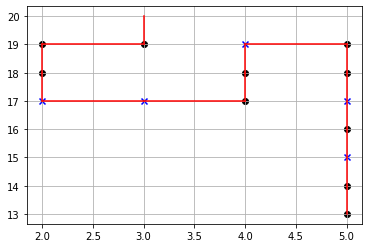

In [366]:
import matplotlib.pyplot as plt


Hx_coordinates = []
Hy_coordinates = []

Px_coordinates = []
Py_coordinates = []

ALL_X=[]
ALL_Y=[]
for i in range(len(updated_grid)):
  for j in range(len(updated_grid[i])):
    if updated_grid[i][j][0]=='H':
      Hx_coordinates.append(j)
      Hy_coordinates.append(i)
    elif updated_grid[i][j][0]=='P':
      Px_coordinates.append(j)
      Py_coordinates.append(i)
  

     




for i in range(len(updated_grid)):
  for j in range(len(updated_grid[i])):
    temp=select_connected_element(updated_grid,i,j)
    if temp is not None:
      plt.plot([j,temp[1]],[i,temp[0]],color='red')
plt.grid()
plt.scatter(Hx_coordinates, Hy_coordinates,marker='o',color='black')
plt.scatter(Px_coordinates, Py_coordinates,marker='x',color='blue')

